In [11]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('bank/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df.shape

(45211, 17)

In [14]:
# unique values in target
print('y', df['y'].unique())
    

y ['no' 'yes']


In [15]:
# check class imbalance
print('y', df['y'].value_counts())

y y
no     39922
yes     5289
Name: count, dtype: int64


In [16]:
df.shape

(45211, 17)

In [17]:
df = df[(df['job'] != 'unknown') & (df['marital'] != 'unknown') & (df['education'] != 'unknown') & (df['default'] != 'unknown') & (df['housing'] != 'unknown') & (df['loan'] != 'unknown') & (df['contact'] != 'unknown') & (df['poutcome'] != 'unknown')]

In [18]:
df = df.drop(['balance','day','pdays','duration'],axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,y
24060,33,admin.,married,tertiary,no,no,no,telephone,oct,1,3,failure,no
24062,42,admin.,single,secondary,no,yes,yes,telephone,oct,1,1,other,yes
24064,33,services,married,secondary,no,yes,no,telephone,oct,1,4,failure,yes
24072,36,management,married,tertiary,no,yes,no,telephone,oct,1,4,other,no
24077,36,management,married,tertiary,no,yes,no,telephone,oct,1,3,failure,yes


In [19]:
#re index the dataframe
df = df.reset_index(drop=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,y
0,33,admin.,married,tertiary,no,no,no,telephone,oct,1,3,failure,no
1,42,admin.,single,secondary,no,yes,yes,telephone,oct,1,1,other,yes
2,33,services,married,secondary,no,yes,no,telephone,oct,1,4,failure,yes
3,36,management,married,tertiary,no,yes,no,telephone,oct,1,4,other,no
4,36,management,married,tertiary,no,yes,no,telephone,oct,1,3,failure,yes


In [20]:
#use label encoder to convert categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['job','marital','education','default','housing','loan','contact','poutcome','y']:
    df[col] = le.fit_transform(df[col])
df.head()


,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,y
0,33,0,1,2,0,0,0,1,oct,1,3,0,0
1,42,0,2,1,0,1,1,1,oct,1,1,1,1
2,33,7,1,1,0,1,0,1,oct,1,4,0,1
3,36,4,1,2,0,1,0,1,oct,1,4,1,0
4,36,4,1,2,0,1,0,1,oct,1,3,0,1


In [21]:
#map month to numerical values
month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month'] = df['month'].map(month_map)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,y
0,33,0,1,2,0,0,0,1,10,1,3,0,0
1,42,0,2,1,0,1,1,1,10,1,1,1,1
2,33,7,1,1,0,1,0,1,10,1,4,0,1
3,36,4,1,2,0,1,0,1,10,1,4,1,0
4,36,4,1,2,0,1,0,1,10,1,3,0,1


In [22]:
for col in df.columns:
    print(col, df[col].unique())

age [33 42 36 44 26 51 30 34 49 47 40 38 54 52 48 45 39 37 43 35 50 56 59 53
 46 32 55 41 57 58 31 60 29 27 28 25 24 22 23 21 83 61 73 19 72 69 62 65
 71 64 20 67 76 68 63 70 74 79 75 77 82 66 80 18 78 81 84 89 86 88]
job [ 0  7  4  1  9 10  2  3  5  6  8]
marital [1 2 0]
education [2 1 0]
default [0 1]
housing [0 1]
loan [0 1]
contact [1 0]
month [10 11  1  2  3  4  5  6  7  8  9 12]
campaign [ 1  2  3  5  4  6  7  8  9 11 10 12 14 15 13 16]
previous [  3   1   4   2  16   6   5  10  12   7  18   9   8  11  14  15  26  37
  13  25  20  27  17  23  38  29  24  51 275  22  19  21  30  58  28  32
  40  55  35]
poutcome [0 1 2]
y [0 1]


In [23]:
sample_dict = {}
for i in range (10):
    sample_dict['S'+str(i+1)] = df.sample(frac=0.25,replace=False)

sample_dict

{'S1':       age  job  marital  education  default  housing  loan  contact  month   
 3894   34    0        2          1        0        1     0        0      5  \
 6222   40    4        2          2        0        0     0        0     12   
 1216   26    7        2          1        0        1     1        0      1   
 6570   47   10        2          2        0        0     0        0      2   
 926    37    1        1          1        0        0     0        0      1   
 ...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
 3053   36    9        2          1        0        1     0        1      5   
 4118   37    4        1          2        0        1     0        0      5   
 1873   36    9        1          1        0        1     1        0      2   
 869    49    7        1          0        0        1     0        0     11   
 3073   27    0        1          1        0        1     1        0      5   
 
       campaign  previous  poutcome  y  
 38

In [24]:
#import svm
#over sampler
from imblearn.over_sampling import SMOTE

import random
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
kernel_list = ['linear','poly','rbf','sigmoid']
best_kernel = ''
best_accuracy = 0
best_C = 0
best_gamma = 0
result_dict = {}

for key, value in sample_dict.items():
    sample_df = value
    X = sample_df.drop('y',axis=1)
    feature_name = X.columns
    y = sample_df['y']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    sm = SMOTE(random_state=2)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    for iter in range(1000):
        kernel = random.choice(kernel_list)
        C = random.uniform(0,1)
        gamma = random.uniform(0,1)
        model = SVC(kernel=kernel,C=C,gamma=gamma,max_iter=1)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel
            best_C = C
            best_gamma = gamma
    result_dict[key] = {'accuracy' : best_accuracy, 'kernel' : best_kernel, 'C' : best_C, 'gamma' : best_gamma}
    print('Best accuracy for sample ',key,' is ',best_accuracy)


    

Best accuracy for sample  S1  is  0.7840136054421769
Best accuracy for sample  S2  is  0.7840136054421769
Best accuracy for sample  S3  is  0.7959183673469388
Best accuracy for sample  S4  is  0.7959183673469388
Best accuracy for sample  S5  is  0.7959183673469388
Best accuracy for sample  S6  is  0.7959183673469388
Best accuracy for sample  S7  is  0.8129251700680272
Best accuracy for sample  S8  is  0.8129251700680272
Best accuracy for sample  S9  is  0.8129251700680272
Best accuracy for sample  S10  is  0.8129251700680272


In [25]:
print(result_dict)

{'S1': {'accuracy': 0.7840136054421769, 'kernel': 'linear', 'C': 0.5249011040088509, 'gamma': 0.012110236775122463}, 'S2': {'accuracy': 0.7840136054421769, 'kernel': 'linear', 'C': 0.5249011040088509, 'gamma': 0.012110236775122463}, 'S3': {'accuracy': 0.7959183673469388, 'kernel': 'sigmoid', 'C': 0.4296088189272843, 'gamma': 0.3792672388655606}, 'S4': {'accuracy': 0.7959183673469388, 'kernel': 'sigmoid', 'C': 0.4296088189272843, 'gamma': 0.3792672388655606}, 'S5': {'accuracy': 0.7959183673469388, 'kernel': 'sigmoid', 'C': 0.4296088189272843, 'gamma': 0.3792672388655606}, 'S6': {'accuracy': 0.7959183673469388, 'kernel': 'sigmoid', 'C': 0.4296088189272843, 'gamma': 0.3792672388655606}, 'S7': {'accuracy': 0.8129251700680272, 'kernel': 'sigmoid', 'C': 0.6065429011866801, 'gamma': 0.05945713545578757}, 'S8': {'accuracy': 0.8129251700680272, 'kernel': 'sigmoid', 'C': 0.6065429011866801, 'gamma': 0.05945713545578757}, 'S9': {'accuracy': 0.8129251700680272, 'kernel': 'sigmoid', 'C': 0.60654290

In [37]:
acc = []
itr = []
kernel_list = ['linear','poly','rbf','sigmoid']

sample_df = sample_dict['S10']
X = sample_df.drop('y',axis=1)
feature_name = X.columns
y = sample_df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
for iter in range(1000):
    kernel = random.choice(kernel_list)
    C = random.uniform(0,1)
    gamma = random.uniform(0,1)
    model = SVC(kernel=kernel,C=C,gamma=gamma, max_iter=10)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy)
    itr.append(iter)

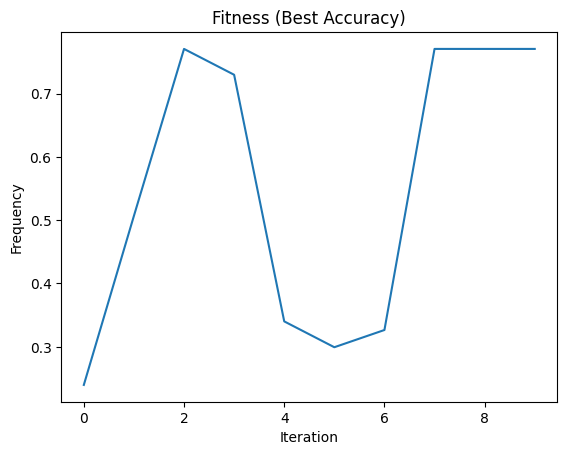

In [38]:
import matplotlib.pyplot as plt

plt.plot(itr, acc,scaley=100)
plt.xlabel("Iteration")  
plt.ylabel("Frequency")  
plt.title("Fitness (Best Accuracy)")  
plt.show()